In [10]:
import numpy as np
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram
simulator = Aer.get_backend('qasm_simulator')
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx([0],[1])
circuit.cx([1],[2])
circuit.measure([0], [0]) 
circuit.measure([1], [1])
circuit.measure([2], [2])
job = execute(circuit, simulator, shots=1000)
# Almacenamos los resultados
result = job.result()
# Capturamos las ocurrencias de salida
counts = result.get_counts(circuit)
# Escribimos el número de ocurrencias
print("\nNúmero de ocurrencias para 0 y 1:",counts)
# Dibujamos el circuito
circuit.draw()


Número de ocurrencias para 0 y 1: {'000': 483, '111': 517}


┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

In [1]:
from qiskit import IBMQ


In [3]:
IBMQ.save_account('b6a64fd92bc0d0f5af8011f1800820500e02cfafc29bb98e2c13c746b883ffa885b544d9e0d286cac28786d034872f25f77be296e88ac9e8bef093cb659536fb')

In [15]:
from qiskit from assemble, transpile
######################
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx([0],[1])
circuit.cx([1],[2])
circuit.measure([0], [0]) 
circuit.measure([1], [1])
circuit.measure([2], [2])
job = execute(circuit, simulator, shots=1000)
######################
provider = IBMQ.load_account()
backend = provider.backends.ibmq_belem
qobj = assemble(transpile(circuit, backend=backend), backend=backend)
job = backend.run(qobj)
retrieved_job = backend.retrieve_job(job.job_id())

ibmqfactory.load_account:WARNING:2021-03-04 12:43:56,254: Credentials are already in use. The existing account in the session will be replaced.


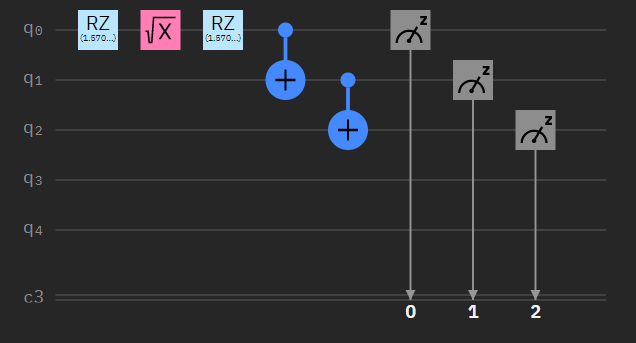

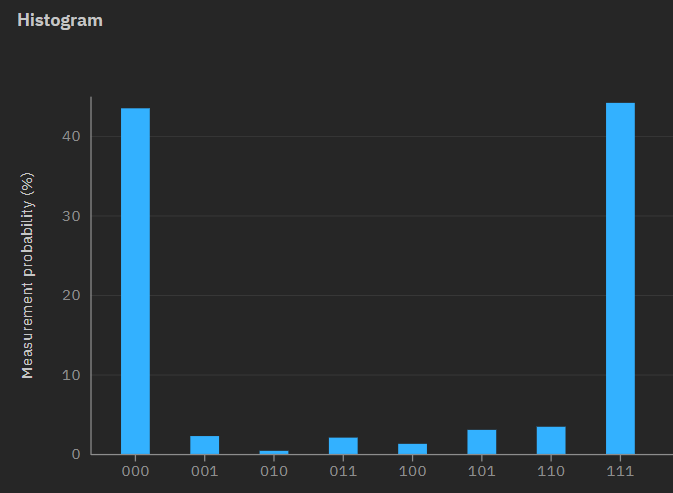

In [23]:
##Simulacion con ruido
from qiskit import QuantumCircuit, execute
from qiskit import IBMQ, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import NoiseModel

# Construir un modelo de ruido a partir de las características de un backend real
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_belem')
noise_model = NoiseModel.from_backend(backend)

# Obtener el mapa de interconexión de los qubits
coupling_map = backend.configuration().coupling_map
# Obtener las características de las puertas básicas
basis_gates = noise_model.basis_gates
######################
# Crear circuito #
circuit = QuantumCircuit(3, 3)
circuit.h(0)
circuit.cx([0],[1])
circuit.cx([1],[2])
circuit.measure([0], [0]) 
circuit.measure([1], [1])
circuit.measure([2], [2])
job = execute(circuit, simulator, shots=1000)
######################

# Perform a noise simulation
result = execute(circuit, Aer.get_backend('qasm_simulator'),
coupling_map=coupling_map,
basis_gates=basis_gates,
noise_model=noise_model).result()
######################
# Mostrar resultados #
counts = result.get_counts(circuit)
# Escribimos el número de ocurrencias
print("\nNúmero de ocurrencias para 0 y 1:",counts)
# Dibujamos el circuito
circuit.draw()
######################

ibmqfactory.load_account:WARNING:2021-03-04 13:17:53,198: Credentials are already in use. The existing account in the session will be replaced.



Número de ocurrencias para 0 y 1: {'000': 492, '001': 24, '010': 5, '011': 25, '100': 5, '101': 9, '110': 45, '111': 419}


┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

# #Diferencias
Utilizando la computadora cuantico real de Ibmq_belen y el simulador de ruidos, obtuvimos un resultado simular.
El ruido, afecta al computador cuantico en los calculos, pueden hacer que los qubits se “caigan” de su estado de superposición antes de que hayan terminado de realizar su trabajo.
Por eso en el computador real cuantico y en el simulafor de ruidos no salen otros bits con muy baja posibilidad.